In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('u.data', sep='\t')
# Datamız daki veriler "tab" ile ayrıldığından (sep='\t') kullandık. Datamızın uzantısında .csv olmadığı için yazmadık.

In [3]:
df.head()

,0,50,5,881250949
0,0,172,5,881250949
1,0,133,1,881250949
2,196,242,3,881250949
3,186,302,3,891717742
4,22,377,1,878887116


In [4]:
df.columns = ['user_id', 'item_id', 'rating', 'timestamp']
# Datamıza columns isimlerini atıyoruz. 

In [5]:
df.head()
# Columns isimleri atanmış hali

,user_id,item_id,rating,timestamp
0,0,172,5,881250949
1,0,133,1,881250949
2,196,242,3,881250949
3,186,302,3,891717742
4,22,377,1,878887116


In [6]:
df.shape

(100002, 4)

In [7]:
movie_titles = pd.read_csv('Movie_Id_Titles')
# Datamızın uzantısında .csv olmadığı için yazmadık.

In [8]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [10]:
df = pd.merge(df, movie_titles, on='item_id')
# df ve movie_titles DataFrame leri her ikisinde ortak olan (item_id) sütunu kullanak birleştiriyoruz ve df DataFrame eşitliyoruz.

In [11]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,172,5,881250949,"Empire Strikes Back, The (1980)"
1,213,172,5,878955442,"Empire Strikes Back, The (1980)"
2,92,172,4,875653271,"Empire Strikes Back, The (1980)"
3,77,172,3,884752562,"Empire Strikes Back, The (1980)"
4,194,172,3,879521474,"Empire Strikes Back, The (1980)"


In [12]:
df.info()
# Missing values yoktur.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100002 entries, 0 to 100001
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    100002 non-null  int64 
 1   item_id    100002 non-null  int64 
 2   rating     100002 non-null  int64 
 3   timestamp  100002 non-null  int64 
 4   title      100002 non-null  object
dtypes: int64(4), object(1)
memory usage: 4.6+ MB


In [13]:
for column in df.columns:
    print(f'Colum. {column} has {df[column].nunique()} unique values.')
# df in herbir sütunundaki unique değerleri kontrol ediyoruz.

Colum. user_id has 944 unique values.
Colum. item_id has 1682 unique values.
Colum. rating has 5 unique values.
Colum. timestamp has 49282 unique values.
Colum. title has 1664 unique values.


### EDA

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

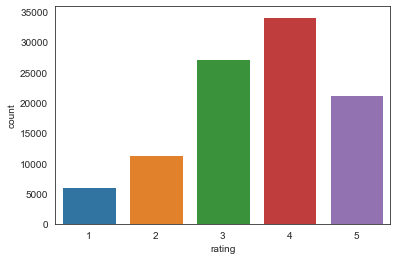

In [16]:
sns.countplot(x='rating', data=df);
# rating sütunumuzdaki değerler numerik olduğu için histplot da kullanılabilir.

In [17]:
df.rating.value_counts()

4    34174
3    27145
5    21202
2    11370
1     6111
Name: rating, dtype: int64

<AxesSubplot:>

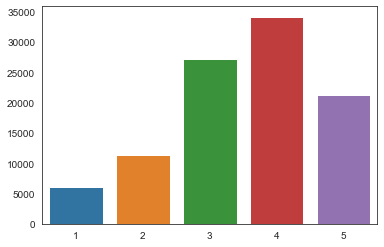

In [19]:
sns.barplot(x=df.rating.value_counts().index, y=df.rating.value_counts().values)
# rating değerlerinin barplot ile gösterimi

In [20]:
df.shape

(100002, 5)

In [21]:
df.title.nunique()
# nunique() title sütunundaki unique değerleri gösteriyor.

1664

In [23]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
They Made Me a Criminal (1939)                       5.0
Marlene Dietrich: Shadow and Light (1996)            5.0
Saint of Fort Washington, The (1993)                 5.0
Someone Else's America (1995)                        5.0
Star Kid (1997)                                      5.0
Great Day in Harlem, A (1994)                        5.0
Aiqing wansui (1994)                                 5.0
Santa with Muscles (1996)                            5.0
Prefontaine (1997)                                   5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Name: rating, dtype: float64

In [26]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

In [28]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [29]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [30]:
ratings.head()

,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [31]:
ratings.shape

(1664, 2)

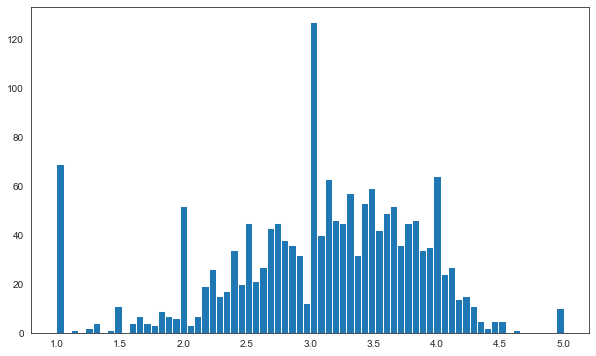

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(ratings.rating, bins=70);

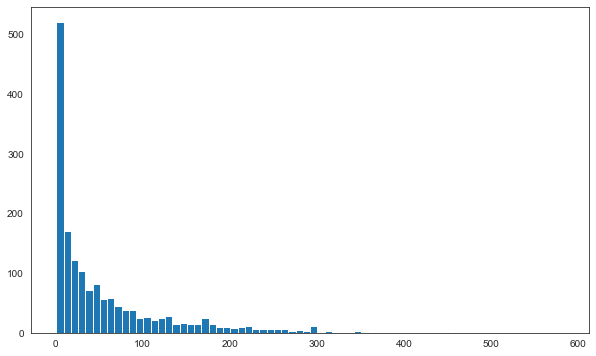

In [36]:
plt.figure(figsize=(10, 6))
plt.hist(ratings['num of ratings'], bins=70);

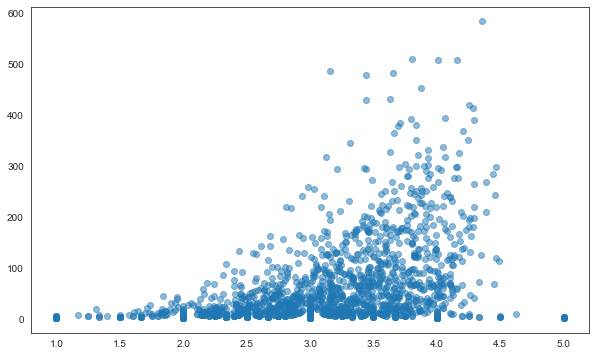

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(x=ratings.rating, y=ratings['num of ratings'], alpha=0.5)

<Figure size 720x432 with 0 Axes>

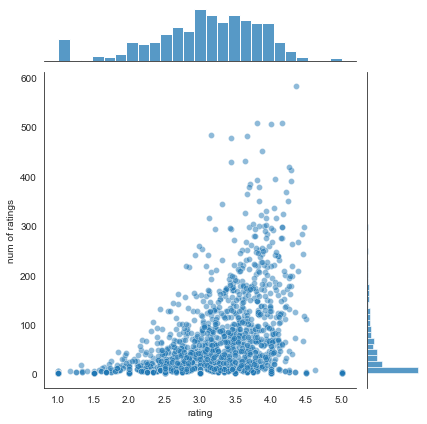

In [41]:
plt.figure(figsize=(10, 6))
sns.jointplot(x='rating', y='num of ratings', data=ratings, alpha=0.5);

### Recommending Similar Movies

In [42]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,172,5,881250949,"Empire Strikes Back, The (1980)"
1,213,172,5,878955442,"Empire Strikes Back, The (1980)"
2,92,172,4,875653271,"Empire Strikes Back, The (1980)"
3,77,172,3,884752562,"Empire Strikes Back, The (1980)"
4,194,172,3,879521474,"Empire Strikes Back, The (1980)"


In [44]:
moviemat = df.pivot_table(values='rating', index='user_id', columns='title')

In [45]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
ratings.sort_values('num of ratings', ascending=False).head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [48]:
liarliar_user_ratings = moviemat['Liar Liar (1997)']

In [50]:
starwars_user_ratings = moviemat['Star Wars (1977)']

In [53]:
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

In [55]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings)

In [57]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])

In [59]:
corr_starwars.isnull().sum()

Correlation    254
dtype: int64

In [60]:
corr_starwars.dropna(inplace=True)

In [61]:
corr_starwars.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [63]:
corr_starwars = corr_starwars.join(ratings['num of ratings'])

In [64]:
corr_starwars.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [67]:
corr_starwars[(corr_starwars['num of ratings']>100) & (corr_starwars['Correlation']>0.5)].sort_values('Correlation', ascending=False).head(10)

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
